In [504]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pycaret.classification import *
from data_sci_toolkit.aws_tools import redshift_tools
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [505]:
#df_train = redshift_tools.get_retention_dataset("prod-app", "stlrflames", 36, 2010, 2021)
#df_train = redshift_tools.get_retention_dataset("prod-app", "stlrnhljets", 92, 2010, 2021)
#df_train = redshift_tools.get_retention_dataset("prod-app", "stlrcanucks", 7, 2010, 2021)
#df_train = redshift_tools.get_retention_dataset("prod-app", "stlrnhlpanthers", 93, 2010, 2021)
df_train = redshift_tools.get_retention_dataset("prod-app", "stlrvgk", 33, 2010, 2021)
#df_train = redshift_tools.get_retention_dataset("prod-app", "stlrcoyotes", 55, 2010, 2021)

Authorized as AROASQ4JELIXYLYV6P4UV:gdonst@stellaralgo.com


In [506]:
df_train["totalspent"].value_counts(bins=[0,15000,100000])

(-0.001, 15000.0]      16574
(15000.0, 100000.0]     4364
Name: totalspent, dtype: int64

In [507]:
df_train["productgrouping"].value_counts()

Full Season    16249
Partial         4909
Name: productgrouping, dtype: int64

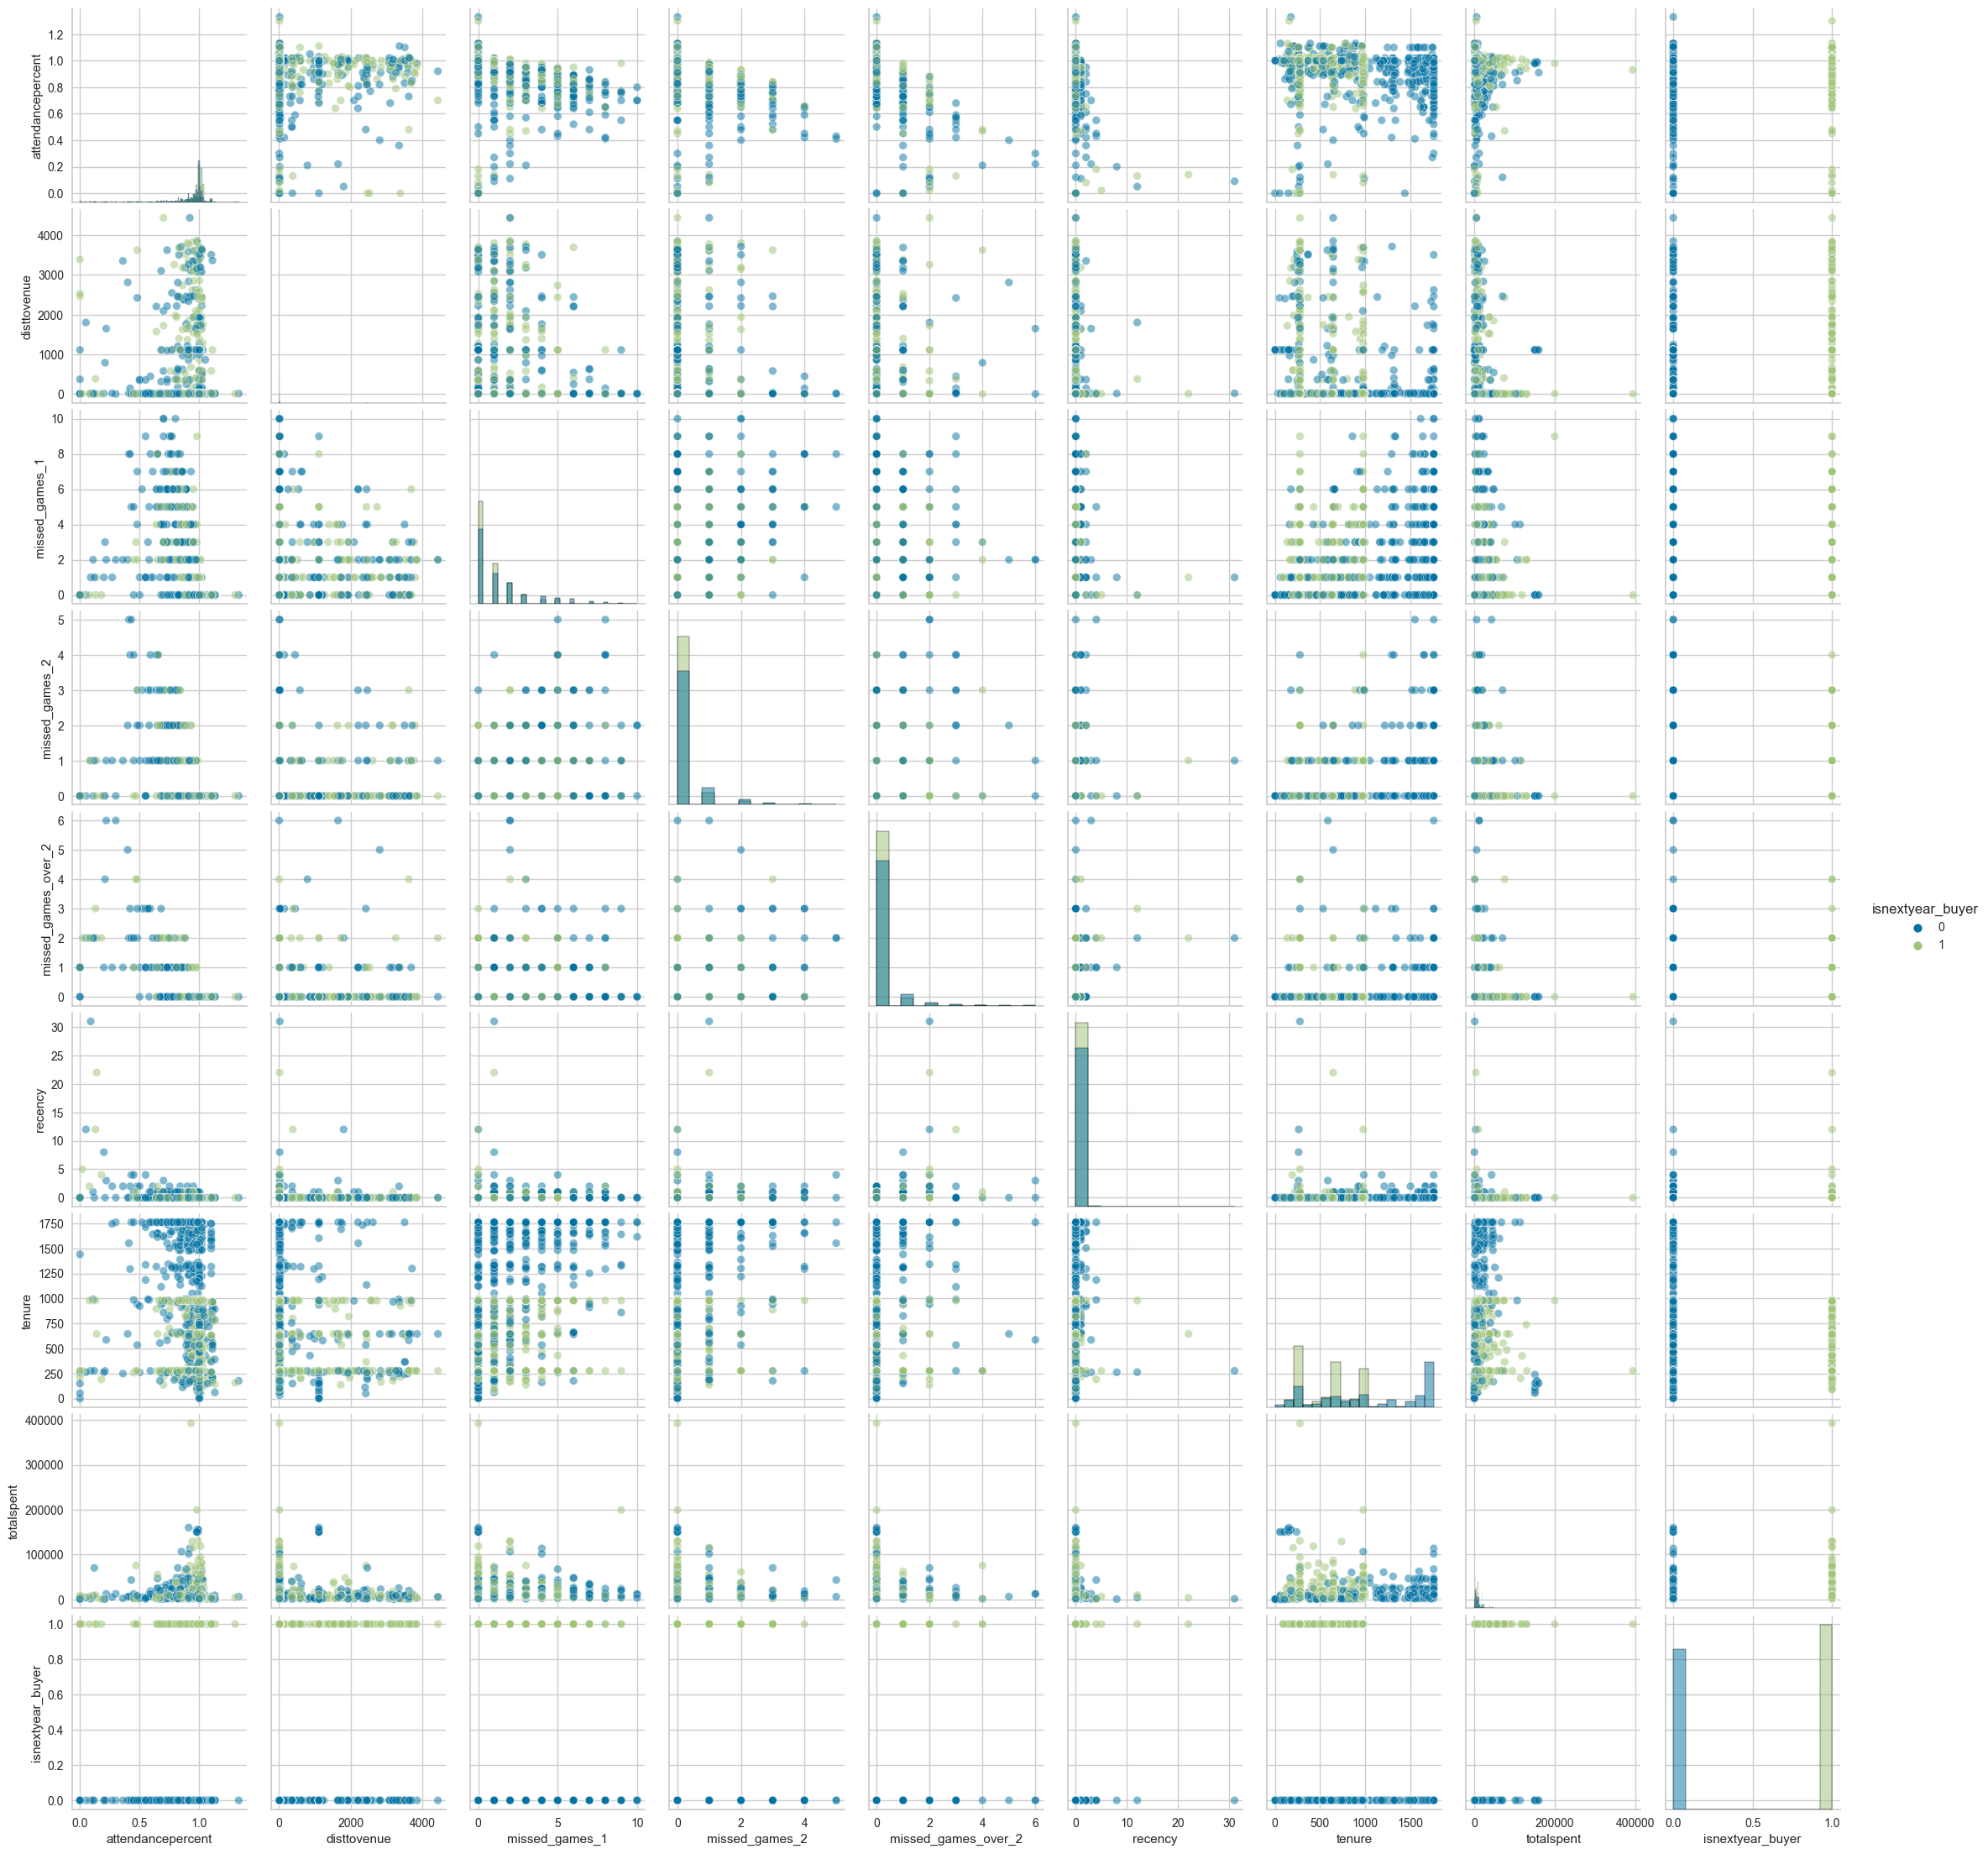

In [508]:
#df_sample = df_train[df_train["totalspent"] <= 15000]
#df_sample = df_sample[df_sample["productgrouping"] == "Full Season"]
df_sample = df_train.sample(frac=0.10)
features = ["attendancepercent",
			"disttovenue",
			"missed_games_1",
			"missed_games_2",
			"missed_games_over_2",
			"recency",
			"tenure",
			"totalspent",
			"isnextyear_buyer"]
df_sample = df_sample[features]

g = sns.pairplot(
    df_sample, hue = "isnextyear_buyer", diag_kind= 'hist',
    vars = df_sample.columns,
    plot_kws = dict(alpha=0.5), 
    diag_kws = dict(alpha=0.5))
    
plt.show()

In [509]:
df_sample["isnextyear_buyer"].value_counts()

1    1133
0     983
Name: isnextyear_buyer, dtype: int64

In [510]:
df_sample.corr(method='pearson')

,attendancepercent,disttovenue,recency,tenure,totalspent,isnextyear_buyer
attendancepercent,1.000000,-0.147931,-0.395972,-0.105614,-0.021534,0.175440
disttovenue,-0.147931,1.000000,0.006111,-0.134486,0.013866,-0.045711
recency,-0.395972,0.006111,1.000000,-0.004903,-0.028137,-0.039562
tenure,-0.105614,-0.134486,-0.004903,1.000000,0.019368,-0.471892
totalspent,-0.021534,0.013866,-0.028137,0.019368,1.000000,0.024002
isnextyear_buyer,0.175440,-0.045711,-0.039562,-0.471892,0.024002,1.000000


In [511]:
df_sample.corr(method='kendall')

,attendancepercent,disttovenue,recency,tenure,totalspent,isnextyear_buyer
attendancepercent,1.000000,-0.032414,-0.219569,-0.072038,-0.076650,0.199227
disttovenue,-0.032414,1.000000,0.014397,-0.040497,-0.069146,-0.075684
recency,-0.219569,0.014397,1.000000,0.069697,-0.040019,-0.102600
tenure,-0.072038,-0.040497,0.069697,1.000000,0.181775,-0.303389
totalspent,-0.076650,-0.069146,-0.040019,0.181775,1.000000,0.089890
isnextyear_buyer,0.199227,-0.075684,-0.102600,-0.303389,0.089890,1.000000


In [561]:
lr_features = ["attendancepercent", "isnextyear_buyer"]

In [562]:
df_lr = df_train[lr_features]

In [563]:
df_lr.head()

,attendancepercent,isnextyear_buyer
0,1.00,1
1,1.02,1
2,1.00,0
3,0.99,1
4,1.02,1


In [564]:
setup(
    data=df_lr,
    target="isnextyear_buyer",
    train_size=0.85,
    data_split_shuffle=True,
    silent=True,
    verbose=False,
    numeric_features=["attendancepercent"]
)

model_matrix = compare_models(
    fold=10, 
    include=["lr"]
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6177,0.6447,0.8777,0.6006,0.7131,0.1967,0.2313,0.0070


In [565]:
evaluate_model(model_matrix)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [566]:
x = df_train["recency"]
y = df_train["isnextyear_buyer"]

#x = sm.add_constant(x)

x.head()

0    0
1    0
2    0
3    0
4    0
Name: recency, dtype: int64

In [567]:
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       isnextyear_buyer   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              30.08
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    4.19e-08
Time:                        16:08:54   Log-Likelihood:                         -23530.
No. Observations:               21158   AIC:                                  4.706e+04
Df Residuals:                   21157   BIC:                                  4.707e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
recency        0.0431      0.008      5.485      0.000       0.028       0.058
==============================================================================
Omnibus:                    74929.906   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3442.616
Skew:                          -0.178   Prob(JB):                         0.00
Kurtosis:                       1.056   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""